Series

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.Series(['a','b','c','d'])

In [3]:
data

0    a
1    b
2    c
3    d
dtype: object

In [4]:
data[1]

'b'

In [5]:
data.values

array(['a', 'b', 'c', 'd'], dtype=object)

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
num = pd.Series([0.2,0.3,0.1,0.7],index = ['a','b','c','d'])

In [8]:
num

a    0.2
b    0.3
c    0.1
d    0.7
dtype: float64

In [9]:
num['b']

0.3

In [10]:
covid_dict = {'usa':10,'india':6,'china':7,'russia':8,'brazil':9}

In [11]:
codata = pd.Series(covid_dict)

In [12]:
codata

usa       10
india      6
china      7
russia     8
brazil     9
dtype: int64

In [13]:
codata['usa':'china']

usa      10
india     6
china     7
dtype: int64

Dataframes

In [14]:
covid_area = {'usa':'texas','india':'mumbai','china':'wuham','russia':'ussr','brazil':'rio'}

In [15]:
coarea = pd.Series(covid_area)

In [16]:
codataframe = pd.DataFrame({'covid_pop':codata,'covid_location':coarea})

In [17]:
codataframe

,covid_pop,covid_location
usa,10,texas
india,6,mumbai
china,7,wuham
russia,8,ussr
brazil,9,rio


In [18]:
codataframe.index

Index(['usa', 'india', 'china', 'russia', 'brazil'], dtype='object')

In [19]:
codataframe.columns

Index(['covid_pop', 'covid_location'], dtype='object')

In [20]:
#Constructing dataframe
#1.from a single series data

In [21]:
pd.DataFrame(coarea,columns=['areas'])

,areas
usa,texas
india,mumbai
china,wuham
russia,ussr
brazil,rio


In [22]:
#2.From a numpy structured array

In [23]:
A = np.zeros(3,dtype = [('a','i8'),('b','f8')] )

In [24]:
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('a', '<i8'), ('b', '<f8')])

In [25]:
A = pd.DataFrame(A)

In [26]:
A

,a,b
0,0,0.0
1,0,0.0
2,0,0.0


In [27]:
#HANDLING MISSING DATA

In [28]:
#nan- NOT A NUMBER with numpy

In [29]:
import numpy as np 
1 + np.nan

nan

In [30]:
0*np.nan

nan

In [31]:
val = np.array([1,np.nan,2,5])

In [32]:
val.sum()

nan

In [33]:
val.max()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


nan

In [34]:
#so if you want to add the data in a array containing nan
np.nansum(val)

8.0

In [35]:
np.nanmax(val)

5.0

In [36]:
#NaN and None in pandas

In [37]:
import pandas as pd 
pd.Series([1,np.nan,2,None]) #Pandas automatically converts None to Nan values

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [38]:
x = pd.Series(range(2),dtype = int)
x

0    0
1    1
dtype: int32

In [39]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Operation on missing values

isnull()
notnull()
dropna()
fillna()


In [40]:
#Detecting null values

In [41]:
data = pd.Series([1,np.nan,'hello',None])

In [42]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [43]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [44]:
#Dropping nan values

In [45]:
df = pd.DataFrame([[1,np.nan,15],
                 [13,2,np.nan],
                 [5,3,9]])
df

,0,1,2
0,1,NaN,15.0
1,13,2.0,NaN
2,5,3.0,9.0


In [46]:
df.dropna() #drops all the rows and colunms with nan values

,0,1,2
2,5,3.0,9.0


In [47]:
 df.dropna(axis=1) #drop all nan colunms 

,0
0,1
1,13
2,5


In [48]:
df[3] = np.nan
df

,0,1,2,3
0,1,NaN,15.0,NaN
1,13,2.0,NaN,NaN
2,5,3.0,9.0,NaN


In [49]:
df.dropna(axis=1,how="all")#drop columns which contains all nan

,0,1,2
0,1,NaN,15.0
1,13,2.0,NaN
2,5,3.0,9.0


In [50]:
df.dropna(axis=1,how="any")#drop columns which contains atleast one nan

,0
0,1
1,13
2,5


In [51]:
df.dropna(axis=0,thresh = 3)#thresh defines minimum number of non-null values to be kept 

,0,1,2,3
2,5,3.0,9.0,NaN


In [52]:
#fill the nan values

In [53]:
data = pd.Series([1,np.nan,23,9,np.nan])
data

0     1.0
1     NaN
2    23.0
3     9.0
4     NaN
dtype: float64

In [54]:
data.fillna(0) #fills the nan values with 0 

0     1.0
1     0.0
2    23.0
3     9.0
4     0.0
dtype: float64

In [55]:
data.fillna(method="ffill") # fills with forward fill(pervious value)

0     1.0
1     1.0
2    23.0
3     9.0
4     9.0
dtype: float64

In [56]:
data.fillna(method="bfill") #fill with backward fill

0     1.0
1    23.0
2    23.0
3     9.0
4     NaN
dtype: float64

In [57]:
#For dataframes, simillar options but can use which axis also
df

,0,1,2,3
0,1,NaN,15.0,NaN
1,13,2.0,NaN,NaN
2,5,3.0,9.0,NaN


In [58]:
df.fillna(method="ffill",axis=1)

,0,1,2,3
0,1.0,1.0,15.0,15.0
1,13.0,2.0,2.0,2.0
2,5.0,3.0,9.0,9.0


Hierarchical Indexing (or) Multi-Indexing

The dataset with three or more dimentions, the dataset with more than one index is called as multi-indexing. Each index is a dimention here.

In [59]:
import pandas as pd
import numpy as np

In [60]:
index = [('Kerala',2000),('Kerala',2010),
        ('Tamilnadu',2000),('Tamilnadu',2010),
        ('Goa',2000),('Goa',2010)]
pops = [2198612,173728911,
      42718627,9172892718,
      1212123,1625372512]

In [61]:
pop = pd.Series(pops,index=index) #Bad way of representing data
pop

(Kerala, 2000)          2198612
(Kerala, 2010)        173728911
(Tamilnadu, 2000)      42718627
(Tamilnadu, 2010)    9172892718
(Goa, 2000)             1212123
(Goa, 2010)          1625372512
dtype: int64

In [62]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['Goa', 'Kerala', 'Tamilnadu'], [2000, 2010]],
           codes=[[1, 1, 2, 2, 0, 0], [0, 1, 0, 1, 0, 1]])

In [63]:
pop = pop.reindex(index)
pop

Kerala     2000       2198612
           2010     173728911
Tamilnadu  2000      42718627
           2010    9172892718
Goa        2000       1212123
           2010    1625372512
dtype: int64

In [64]:
pop[:,2010]

Kerala        173728911
Tamilnadu    9172892718
Goa          1625372512
dtype: int64

In [65]:
#unstack() -- converts multiply indexed series into a conventionally indexed Dataframe

In [66]:
pop_df = pop.unstack()
pop_df

,2000,2010
Goa,1212123,1625372512
Kerala,2198612,173728911
Tamilnadu,42718627,9172892718


In [67]:
#stack() -- oppsite tp unstack()
pop_df = pop_df.stack()
pop_df

Goa        2000       1212123
           2010    1625372512
Kerala     2000       2198612
           2010     173728911
Tamilnadu  2000      42718627
           2010    9172892718
dtype: int64

In [68]:
#Adding another colunm to multiindexed dataframe
pop_df = pd.DataFrame({'total':pop,
                      'under18':[12345,233423,
                                23412,742861,
                                12342,9328139]})
pop_df

total  under18
Kerala    2000     2198612    12345
          2010   173728911   233423
Tamilnadu 2000    42718627    23412
          2010  9172892718   742861
Goa       2000     1212123    12342
          2010  1625372512  9328139

In [69]:
#Methods of MultiIndex Creation : 
#Explicit MultiIndex constructors, MultiIndex Level names, MultiIndex for cloumns

In [70]:
#Simple creation of MultiIndex 
data = pd.DataFrame(np.random.rand(4,2),
                   index=[['a','a','b','b'],[1,2,1,2]],
                   columns=['data1','data2'])
data

data1     data2
a 1  0.824909  0.177424
  2  0.367928  0.959776
b 1  0.818415  0.749208
  2  0.197430  0.952457

In [71]:
#Use the class method constructor 
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [72]:
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [73]:
pd.MultiIndex.from_product([['a','b'],[1,2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [74]:
#Explicit MultiIndex constructors
#construct a Mulitiindex using internal encoding - levels&labels
pd.MultiIndex(levels=[['a','b'],[1,2]],
             codes = [[0,1,0,1],[0,1,0,1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 1, 0, 1], [0, 1, 0, 1]])

In [75]:
#MultiIndex Level names - specifying names to indexes.
pop.index.names = ['STATES','YEAR']
pop

STATES     YEAR
Kerala     2000       2198612
           2010     173728911
Tamilnadu  2000      42718627
           2010    9172892718
Goa        2000       1212123
           2010    1625372512
dtype: int64

In [76]:
#MultiIndex for cloumns 

index = pd.MultiIndex.from_product([['2000','2010'],[1,2]],
                                  names=['YEAR','VISITS'])

columns = pd.MultiIndex.from_product([['Stark','Thor','Hulk'],['HR','Temp']],
                                    names=['SUBJECT','TYPE'])

#mock some data
data = np.round(np.random.rand(4,6),1)
data[:,::2]*= 10
data+= 37

health_data = pd.DataFrame(data,index = index,columns=columns)
health_data

SUBJECT     Stark        Thor        Hulk      
TYPE           HR  Temp    HR  Temp    HR  Temp
YEAR VISITS                                    
2000 1       45.0  37.3  37.0  37.8  38.0  37.5
     2       38.0  37.9  43.0  37.6  40.0  37.9
2010 1       39.0  37.4  39.0  37.3  37.0  37.2
     2       42.0  38.0  37.0  38.0  39.0  37.3

In [77]:
health_data['Thor']

TYPE           HR  Temp
YEAR VISITS            
2000 1       37.0  37.8
     2       43.0  37.6
2010 1       39.0  37.3
     2       37.0  38.0

Indexing and Slicing a MultiIndex

In [78]:
#Multiple indexed Series 

In [79]:
pop

STATES     YEAR
Kerala     2000       2198612
           2010     173728911
Tamilnadu  2000      42718627
           2010    9172892718
Goa        2000       1212123
           2010    1625372512
dtype: int64

In [80]:
pop['Kerala',2010]

173728911

In [81]:
pop['Kerala']

YEAR
2000      2198612
2010    173728911
dtype: int64

In [82]:
#Partial slicing is available as long as Multiindex index is sorted.
pop[:,2000]


STATES
Kerala        2198612
Tamilnadu    42718627
Goa           1212123
dtype: int64

In [83]:
#Indexing and selection based on boolean masks
pop[pop> 2000000]

STATES     YEAR
Kerala     2000       2198612
           2010     173728911
Tamilnadu  2000      42718627
           2010    9172892718
Goa        2010    1625372512
dtype: int64

In [84]:
#Selection based on fancy indexing 
pop[['Kerala','Goa']]

STATES  YEAR
Kerala  2000       2198612
        2010     173728911
Goa     2000       1212123
        2010    1625372512
dtype: int64

In [85]:
#Multiple indexed DataFrames

In [86]:
health_data

SUBJECT     Stark        Thor        Hulk      
TYPE           HR  Temp    HR  Temp    HR  Temp
YEAR VISITS                                    
2000 1       45.0  37.3  37.0  37.8  38.0  37.5
     2       38.0  37.9  43.0  37.6  40.0  37.9
2010 1       39.0  37.4  39.0  37.3  37.0  37.2
     2       42.0  38.0  37.0  38.0  39.0  37.3

In [87]:
health_data['Stark','HR']

YEAR  VISITS
2000  1         45.0
      2         38.0
2010  1         39.0
      2         42.0
Name: (Stark, HR), dtype: float64

In [88]:
health_data.iloc[:2,:2]

SUBJECT     Stark      
TYPE           HR  Temp
YEAR VISITS            
2000 1       45.0  37.3
     2       38.0  37.9

In [89]:
idx= pd.IndexSlice
health_data.loc[idx[:,1],idx[:,'HR']]

,SUBJECT,Stark,Thor,Hulk
,TYPE,HR,HR,HR
YEAR,VISITS,,,
2000,1,45.0,37.0,38.0
2010,1,39.0,39.0,37.0


In [90]:
#Rearranging Multi-Indices

In [91]:
#sorted and unsorted indices - Slicing operations will fail if the index is not sorted

In [92]:
index = pd.MultiIndex.from_product([['a','c','b'],[1,2]])
data = pd.Series(np.random.rand(6),index = index)
data.index.names= ['char','int']
data #unsorted 

char  int
a     1      0.164747
      2      0.518884
c     1      0.645108
      2      0.309284
b     1      0.193920
      2      0.713600
dtype: float64

In [93]:
try:
    data['a':'b'] #error when slicing a unsorted data
except KeyError as e:
    print(type(e))
    print(e)
    print('The data is not sorted')


<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'
The data is not sorted


In [94]:
data = data.sort_index()
data #sorted

char  int
a     1      0.164747
      2      0.518884
b     1      0.193920
      2      0.713600
c     1      0.645108
      2      0.309284
dtype: float64

In [95]:
data['a':'b']

char  int
a     1      0.164747
      2      0.518884
b     1      0.193920
      2      0.713600
dtype: float64

In [96]:
#Index Setting and Resetting

#reset_index() --> Turns the index labels into columns
#set_index() --> columns to multi-index dataframe

In [97]:
pop #STATES & YEAR are the multi index

STATES     YEAR
Kerala     2000       2198612
           2010     173728911
Tamilnadu  2000      42718627
           2010    9172892718
Goa        2000       1212123
           2010    1625372512
dtype: int64

In [98]:
pop_flat = pop.reset_index(name='population')
pop_flat

,STATES,YEAR,population
0,Kerala,2000,2198612
1,Kerala,2010,173728911
2,Tamilnadu,2000,42718627
3,Tamilnadu,2010,9172892718
4,Goa,2000,1212123
5,Goa,2010,1625372512


In [99]:
pop_flat.set_index(['STATES','YEAR'])

population
STATES    YEAR            
Kerala    2000     2198612
          2010   173728911
Tamilnadu 2000    42718627
          2010  9172892718
Goa       2000     1212123
          2010  1625372512

In [100]:
#Data aggregation on Multi-Indices
#Pandas has built-in aggregation methods like sum(),max(),min() etc

In [101]:
health_data

SUBJECT     Stark        Thor        Hulk      
TYPE           HR  Temp    HR  Temp    HR  Temp
YEAR VISITS                                    
2000 1       45.0  37.3  37.0  37.8  38.0  37.5
     2       38.0  37.9  43.0  37.6  40.0  37.9
2010 1       39.0  37.4  39.0  37.3  37.0  37.2
     2       42.0  38.0  37.0  38.0  39.0  37.3

In [102]:
data_mean = health_data.mean(level ='YEAR')
data_mean

SUBJECT Stark        Thor         Hulk       
TYPE       HR  Temp    HR   Temp    HR   Temp
YEAR                                         
2000     41.5  37.6  40.0  37.70  39.0  37.70
2010     40.5  37.7  38.0  37.65  38.0  37.25

In [103]:
data_mean.mean(axis=1,level='TYPE') #Along axis=1 i.e columns

TYPE,HR,Temp
YEAR,,
2000,40.166667,37.666667
2010,38.833333,37.533333


Combinging Datasets: Concat and Append

In [104]:
#Function to create a dataset
def make_df(col,ind):
    data = {c:[str(c)+str(i) for i in ind] for c in col}
    return pd.DataFrame(data,ind)

In [105]:
#example dataframe
make_df('ABC',range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [106]:
#Using simple pd.concat 

In [107]:
ser1 = pd.Series(['A','B','C'],index =[1,2,3])
ser2 = pd.Series(['D','E','F'],index = [4,5,6])
print(ser1);print("\n");print(ser2)
print("\n")
print("Concatenated")
_ser = pd.concat([ser1,ser2]) #concat along rows
print(_ser)

1    A
2    B
3    C
dtype: object


4    D
5    E
6    F
dtype: object


Concatenated
1    A
2    B
3    C
4    D
5    E
6    F
dtype: object


In [108]:
pd.concat([ser1,ser2],axis = 1) #concat along columns

,0,1
1,A,NaN
2,B,NaN
3,C,NaN
4,NaN,D
5,NaN,E
6,NaN,F


In [109]:
df1 = make_df('AB',[1,2])
df2 = make_df('AB',[3,4])
print(df1);print("\n");print(df2)

_df = pd.concat([df1,df2],sort=False) #Sort comes with newer pd version ; mine is 24.0
print("\n")
print(_df)

    A   B
1  A1  B1
2  A2  B2


    A   B
3  A3  B3
4  A4  B4


    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [110]:
df3 = make_df('AB',[0,1])
df4 = make_df('CD',[0,1])
print(df3);print("\n");print(df4)

_df = pd.concat([df3,df4],axis=1,sort=False) #Concate along columns
print("\n")
print(_df)

    A   B
0  A0  B0
1  A1  B1


    C   D
0  C0  D0
1  C1  D1


    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [111]:
#Duplicate indices

#pd.concat is that Pandas concatenation 'preserves indices' even if the result will have duplicate indices!


In [112]:
x = make_df('AB',[0,1])
y = make_df('AB',[2,3])
y.index = x.index #make duplicate indices!
print(x);print('\n');print(y);print('\n');print(pd.concat([x,y]))

    A   B
0  A0  B0
1  A1  B1


    A   B
0  A2  B2
1  A3  B3


    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [113]:
#Ways to handle duplicates in pd.concat
# 1) Catching the repeats as an error
# 2) Ignoring the index
# 3) Adding MultiIndex keys

In [114]:
#1) Catching the repeats as an error - verify_integrity flag set to True will raise an exception if there are duplicate indices

try:
    pd.concat([x,y],verify_integrity=True)
except ValueError as e:
    print('ValueError: ',e)

ValueError:  Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [115]:
#2) Ignoring the index - ignore_index flag set to True will create a new integer index for the resulting Series,
print(x);print('\n');print(y);print('\n');print(pd.concat([x,y],ignore_index= True))


    A   B
0  A0  B0
1  A1  B1


    A   B
0  A2  B2
1  A3  B3


    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [116]:
#3) Adding MultiIndex keys - hierarchically indexed series or multiply indexed DataFrame
print(x);print('\n');print(y);print('\n');print(pd.concat([x,y],keys=['x','y']))

    A   B
0  A0  B0
1  A1  B1


    A   B
0  A2  B2
1  A3  B3


      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [117]:
#Concatenation with joins - join & join_axes

In [118]:
df5 = make_df('ABC',[1,2])
df6 = make_df('BCD',[3,4])
print(df5);print("\n");print(df6)

_df = pd.concat([df5,df6],sort=False)
print("\n")
print(_df)

    A   B   C
1  A1  B1  C1
2  A2  B2  C2


    B   C   D
3  B3  C3  D3
4  B4  C4  D4


     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [119]:
df5 = make_df('ABC',[1,2])
df6 = make_df('BCD',[3,4])
print(df5);print("\n");print(df6)

_df = pd.concat([df5,df6],join='inner',sort=False) #join inner ingores all the NaN values
print("\n")
print(_df)

    A   B   C
1  A1  B1  C1
2  A2  B2  C2


    B   C   D
3  B3  C3  D3
4  B4  C4  D4


    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [120]:
df5 = make_df('ABC',[1,2])
df6 = make_df('BCD',[3,4])
print(df5);print("\n");print(df6)

_df = pd.concat([df5,df6],join_axes=[df5.columns],sort=False)
print("\n")
print(_df)

    A   B   C
1  A1  B1  C1
2  A2  B2  C2


    B   C   D
3  B3  C3  D3
4  B4  C4  D4


     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [121]:
#The append() method

In [122]:
print(df1);print("\n");print(df2);print("\n");print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2


    A   B
3  A3  B3
4  A4  B4


    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


Combining Datasets: MERGE AND JOIN

In [123]:
#Categories of joins - one-to-one, many-to-one,many-to-many joins

In [124]:
#one-to-one joins,

df1 = pd.DataFrame({'employee':['sai','saran','naveen','ranjith'],'group':['Developer','Designer','Marketing','Developer']})
df2 = pd.DataFrame({'employee':['saran','naveen','sai','ranjith'],'hire_date':[2008,2009,2010,2012]})
print(df1);print('\n');print(df2)

  employee      group
0      sai  Developer
1    saran   Designer
2   naveen  Marketing
3  ranjith  Developer


  employee  hire_date
0    saran       2008
1   naveen       2009
2      sai       2010
3  ranjith       2012


In [125]:
df3 = pd.merge(df1,df2) #the result of merge is a new dataframe. Merge in general discards the index, except in the special case of merges by index.
print(df3)

  employee      group  hire_date
0      sai  Developer       2010
1    saran   Designer       2008
2   naveen  Marketing       2009
3  ranjith  Developer       2012


In [126]:
#many-to-one joins

df4 = pd.DataFrame({'group':['Developer','Designer','Marketing'],'supervisor':['carly','guido','steve']})
print(df3);print('\n');print(df4)

  employee      group  hire_date
0      sai  Developer       2010
1    saran   Designer       2008
2   naveen  Marketing       2009
3  ranjith  Developer       2012


       group supervisor
0  Developer      carly
1   Designer      guido
2  Marketing      steve


In [127]:
print(pd.merge(df3,df4)) #The resulting dataframe will have additional column with the 'supervisor' information where the information is repeated in one or more locations as required by the inputs

  employee      group  hire_date supervisor
0      sai  Developer       2010      carly
1  ranjith  Developer       2012      carly
2    saran   Designer       2008      guido
3   naveen  Marketing       2009      steve


In [128]:
#Many-to-many joins - If the key in both left and right array contains duplicates, then the result is many-to-many merge.
df5 = pd.DataFrame({'group':['Developer','Developer','Designer','Designer','Marketing','Marketing'],'skills':['python','datascience','figma','photoshop','excel','spreadsheets']})
print(df1);print('\n');print(df5)

  employee      group
0      sai  Developer
1    saran   Designer
2   naveen  Marketing
3  ranjith  Developer


       group        skills
0  Developer        python
1  Developer   datascience
2   Designer         figma
3   Designer     photoshop
4  Marketing         excel
5  Marketing  spreadsheets


In [129]:
print(pd.merge(df1,df5))

  employee      group        skills
0      sai  Developer        python
1      sai  Developer   datascience
2  ranjith  Developer        python
3  ranjith  Developer   datascience
4    saran   Designer         figma
5    saran   Designer     photoshop
6   naveen  Marketing         excel
7   naveen  Marketing  spreadsheets


In [130]:
#Specification of merge key

In [131]:
#The on keyword 
print(df1);print('\n');print(df2);print('\n')
print(pd.merge(df1,df2,on='employee'))

  employee      group
0      sai  Developer
1    saran   Designer
2   naveen  Marketing
3  ranjith  Developer


  employee  hire_date
0    saran       2008
1   naveen       2009
2      sai       2010
3  ranjith       2012


  employee      group  hire_date
0      sai  Developer       2010
1    saran   Designer       2008
2   naveen  Marketing       2009
3  ranjith  Developer       2012


In [132]:
#The left_on and right_on keyword
#Use this to merge two datasets with different column names
df2aa = pd.DataFrame({'name':['saran','sai','ranjith','naveen'],'hire_date':[2008,2010,2012,2009]})
print(df2aa);print('\n')
df2aa_merge = pd.merge(df1,df2aa,left_on = 'employee',right_on='name')
print(df2aa_merge)

      name  hire_date
0    saran       2008
1      sai       2010
2  ranjith       2012
3   naveen       2009


  employee      group     name  hire_date
0      sai  Developer      sai       2010
1    saran   Designer    saran       2008
2   naveen  Marketing   naveen       2009
3  ranjith  Developer  ranjith       2012


In [133]:
#then you drop a column with identical names (i.e on employee and name columns)
print(df2aa_merge.drop('name',axis=1))

  employee      group  hire_date
0      sai  Developer       2010
1    saran   Designer       2008
2   naveen  Marketing       2009
3  ranjith  Developer       2012


In [134]:
#The left_index and right_index
#To merge on a index

In [135]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a);print('\n');print(df2a)

              group
employee           
sai       Developer
saran      Designer
naveen    Marketing
ranjith   Developer


          hire_date
employee           
saran          2008
naveen         2009
sai            2010
ranjith        2012


In [136]:
print(pd.merge(df1a,df2a,left_index=True,right_index=True))

              group  hire_date
employee                      
sai       Developer       2010
saran      Designer       2008
naveen    Marketing       2009
ranjith   Developer       2012


In [137]:
#Specifyting Set Arithmetic for Joins

In [138]:
#This comes up when value appears in one key column but not the other.
#Example,
df6 = pd.DataFrame({'name':['Stark','Snow','Jon'],'food':['Fish','Chicken','Egg']},columns=['name','food'])
df7 = pd.DataFrame({'name':['Snow','Joker'],'drink':['Wine','Coke']},columns=['name','drink'])
print(df6);print('\n');print(df7)

    name     food
0  Stark     Fish
1   Snow  Chicken
2    Jon      Egg


    name drink
0   Snow  Wine
1  Joker  Coke


In [139]:
print(pd.merge(df6,df7))

   name     food drink
0  Snow  Chicken  Wine


In [140]:
print(pd.merge(df6,df7,how='inner')) #inner join

   name     food drink
0  Snow  Chicken  Wine


In [141]:
print(pd.merge(df6,df7,how='outer')) #outer join - returns a join over the union of input coulnms and fills in all missing values with NaN

    name     food drink
0  Stark     Fish   NaN
1   Snow  Chicken  Wine
2    Jon      Egg   NaN
3  Joker      NaN  Coke


In [142]:
print(pd.merge(df6,df7,how='left')) #left join - the output rows corresponds to the entries in the left input

    name     food drink
0  Stark     Fish   NaN
1   Snow  Chicken  Wine
2    Jon      Egg   NaN


In [143]:
print(pd.merge(df6,df7,how='right')) #right join - the output rows corresponds to the entries in the right input

    name     food drink
0   Snow  Chicken  Wine
1  Joker      NaN  Coke


In [144]:
#Overlapping column names: The suffixes Keyword

In [145]:
df8 = pd.DataFrame({'name':['Thor','Hulk','CA'],'rank':[1,2,3]},columns=['name','rank'])
df9 = pd.DataFrame({'name':['Thor','Hulk','CA'],'rank':[3,1,2]},columns=['name','rank'])
print(df8);print('\n');print(df9)

   name  rank
0  Thor     1
1  Hulk     2
2    CA     3


   name  rank
0  Thor     3
1  Hulk     1
2    CA     2


In [146]:
print(pd.merge(df8,df9,on='name')) #Because the output would have two conflicting column names, the merge function automatically appends a suffix _x or _y to make output columns unique.


   name  rank_x  rank_y
0  Thor       1       3
1  Hulk       2       1
2    CA       3       2


In [147]:
print(pd.merge(df8,df9,on='name',suffixes=['_L','_R'])) #add custom suffixes

   name  rank_L  rank_R
0  Thor       1       3
1  Hulk       2       1
2    CA       3       2


In [148]:
#Example Dataset - Task :- Rank US states and territories by their 2010 population denstiy.

In [149]:
pop = pd.read_csv('state-population.csv')
area = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

In [150]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [151]:
area.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [152]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [153]:
merged = pd.merge(pop,abbrevs,how = 'outer',left_on= 'state/region',right_on='abbreviation')
merged = merged.drop('abbreviation',1)
print(merged.head())

  state/region     ages  year  population    state
0           AL  under18  2012   1117489.0  Alabama
1           AL    total  2012   4817528.0  Alabama
2           AL  under18  2010   1130966.0  Alabama
3           AL    total  2010   4785570.0  Alabama
4           AL  under18  2011   1125763.0  Alabama


In [154]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [155]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [156]:
merged.loc[merged['state'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [157]:
merged.loc[merged['state/region']=='PR','state'] = 'Puerto Rico'
merged.loc[merged['state/region']=='USA','state'] = 'United States'

In [158]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [159]:
final = pd.merge(merged,area, on= 'state',how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [160]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [161]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [162]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [163]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [164]:
data2010.set_index('state',inplace=True)
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [165]:
density = data2010['population'] / data2010['area (sq. mi)']

In [166]:
density.head()

state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64

In [167]:
density.sort_values(ascending=False,inplace=True)

In [168]:
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

District of Columbia-8898.897059 is the highest density state


In [169]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

Alaska-1.087509 is the least density state

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

Aggregation and Grouping 

In [170]:
rng = np.random.RandomState(42)
df = pd.DataFrame({'A':rng.rand(5),'B':rng.rand(5)})
df.head()

,A,B
0,0.374540,0.155995
1,0.950714,0.058084
2,0.731994,0.866176
3,0.598658,0.601115
4,0.156019,0.708073


In [171]:
df.mean()

A    0.562385
B    0.477888
dtype: float64

In [172]:
df.mean(axis='columns') #calculating mean towards columns

0    0.265267
1    0.504399
2    0.799085
3    0.599887
4    0.432046
dtype: float64

In [173]:
#Loading a new dataset
planets = pd.read_csv("planets.csv") 
planets.shape 

(1035, 6)

In [174]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [175]:
planets.dropna().describe() #for example, we see in the year column that although exoplanets were discovered as far back as 1989, half of all know exoplantes were not discovered until 2010 or after. 'Kepler mission' which is a space based telescope designed for finding exoplanets around other stars.

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


List of pandas aggregation methods:
count() - total number of items 
first(), last() - First and last items
mean(), median() - Mean and median
min(), max() - Minimum and Maximum
std(),var()- Standard deviation and variance
mad() - Mean absolute deviation
prod() - Product of all items
sum() - Sum of all items

In [176]:
#Groupby: Split,Apply,Combine - groupby operation, which allows you to quickly and efficiently compute aggregates on subsets of data


![alt text](groupby_diagram1.jpg "A visual representation of a groupby operation")

In [177]:
#Column indexing

In [178]:
planets.groupby('method')

In [179]:
planets.groupby('method')['orbital_period'] #NOTE: As with groupby, no computation is done until we call some aggregate on the object

In [180]:
planets.groupby('method')['orbital_period'].median() #This gives an idea of the general scale of orbital periods(in days) that each method is sensitive to. 

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [181]:
#Iteration over groups

In [182]:
for (method,group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method,group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [183]:
#Dispatch method

In [184]:
planets.groupby('method').describe().unstack() #They are applied to individual group, and the results are the combined within GroupBy and returned.

               method                       
number  count  Astrometry                          2.000000
               Eclipse Timing Variations           9.000000
               Imaging                            38.000000
               Microlensing                       23.000000
               Orbital Brightness Modulation       3.000000
               Pulsar Timing                       5.000000
               Pulsation Timing Variations         1.000000
               Radial Velocity                   553.000000
               Transit                           397.000000
               Transit Timing Variations           4.000000
        mean   Astrometry                          1.000000
               Eclipse Timing Variations           1.666667
               Imaging                             1.315789
               Microlensing                        1.173913
               Orbital Brightness Modulation       1.666667
               Pulsar Timing                       2.20

Aggregate , filter , transform , apply 

In [185]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key':['A','B','C','A','B','C'],'data1':range(6),'data2':rng.randint(0,10,6)},columns=['key','data1','data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [186]:
#Aggregate - It can take a string, a function, or a list thereof and compute all the aggregates at once.
df.groupby('key').aggregate(['min',np.median,max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [187]:
df.groupby('key').aggregate({'data1':min,'data2':max})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [188]:
#Filtering - A filtering allows you to drop data based on the group properties.

def filter_func(x): #For example, we might want to keep all groups in which the standard devaiation is larger than some critical value.
    return x['data2'].std() > 4

filtered = df.groupby('key').filter(filter_func)

print(df.groupby('key').std())
print('\n');print("After droping data less than std 4:  ")
print('\n');print(filtered) #Dropped all the group A because A does not have a std greater than 4

       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641


After droping data less than std 4:  


  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [189]:
#Transformation
df.groupby('key').transform(lambda x: x - x.mean()) # for example, center the data by subtracting the group-wise mean.

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [190]:
#Apply - the apply() method allows you to apply an arbitray function to  group results. The function takes a dataframe and returns a pandas object or scalar.
def norm_by_data2(x):
    #x is a dataframe in group values
    x['data1'] = x['data1'] / x['data2'].sum() # for example, noramlizes the first column by the sum of the second. 
    return x
print(df.groupby('key').apply(norm_by_data2))

  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [191]:
#Specifying the split key

In [192]:
#A list,array, series or index providing the grouping key
df1 = df.groupby('key').sum()
print(df1);print('\n')
#or
df2 =df.groupby(df['key']).sum()
print(df2)

     data1  data2
key              
A        3      8
B        5      7
C        7     12


     data1  data2
key              
A        3      8
B        5      7
C        7     12


In [193]:
#A dictionary or series mapping index to group
df2 = df.set_index('key')
mapping = {'A':'vowel','B':'consonant','C':'consonant'}
print(df2.groupby(mapping).sum())

           data1  data2
consonant     12     19
vowel          3      8


In [194]:
#Any python function - can be passed 
print(df2.groupby(str.lower).mean())

   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


In [195]:
#A list of vaild keys
df2.groupby([str.lower,mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [196]:
#Example of these with planet dataset
decade = 10*(planets['year']//10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method',decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


Pivot Tables

In [200]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [203]:
#by groupby - finding the survival by sex and class
titanic.groupby(['sex','class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [204]:
#by pivot table - As the groupby code was long to read, that why pivot table is introduced
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [205]:
#multilevel pivot_table

In [214]:
#for example, we might be interested in looking at age as third dimension. We'll bin the age using the pd.cut function
#3-dimention
age = pd.cut(titanic['age'],bins=[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [216]:
#via columns, let's add info on fare paid using pd.qcut to automatically compute quantiles.
#4-dimentions
fare = pd.qcut(titanic['fare'],2)
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [218]:
#Example dataset

births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [220]:
births['decade'] = 10*(births['year']//10)
births.pivot_table('births',index='decade',columns='gender',aggfunc=sum)

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'Total births per year')

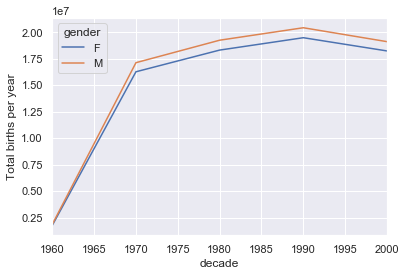

In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() #use seaborn style
births.pivot_table('births',index='decade',columns='gender',aggfunc=sum).plot()
plt.ylabel('Total births per year')